In [ ]:
"""
Code to check on the amt pCO2 trend using the PCO2AIR_SECULAR routine in fennel.h.

RESULT: this looks pretty good.  

Clearly shows an accelerating trend with seasonal cycle.

and overlay very well with observations from Scripps 

"""


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

from lo_tools import plotting_functions as pfun
from lo_tools import Lfun
Ldir = Lfun.Lstart()


In [2]:
#  the obs from Scripps C program
source = 'pCO2'
in_file = Ldir['data'] / 'obs' / source / 'air'/'monthly_in_situ_co2_mlo.csv'

In [3]:
v_dict = {
    '  Yr':'year',
    ' Mn':'month',
    '    Date':'Date_excel',
    '      Date':'Date',
    '     CO2':'CO2 (ppm)',
    'seasonally':'CO2_seasonally_adjusted (ppm)',
    '        fit':'CO2_fit (ppm)',
    '  seasonally':'CO2_seasonally_adjusted_fit (ppm)',
    '      CO2':'CO2_filled (ppm)',
    ' seasonally':'CO2_seasonally_adjusted_filled (ppm)',
    ' Sta':'station'
}

In [4]:
df0 = pd.read_csv(in_file, skiprows=61, usecols=list(v_dict.keys()))
df0.rename(columns=v_dict, inplace=True)
df0 = df0.drop([0, 1])
df0 = df0.reset_index(drop=True)
df0['day'] = 15
df0 = df0.apply(pd.to_numeric, errors='coerce')
# missing data is -99.99
df0[df0==-99.99] = np.nan
df0['datetime'] = pd.to_datetime(df0[['year', 'month', 'day']])


In [5]:
pi2 = 6.2831853071796

# D0 = 282.6
D0 = 314.8

# D1 = 0.125
D1 = 0.05  # how slopy it is

# D2 =-7.18
D2 = 4.5 # phase

# D3 = 0.86
D3 = -0.5 

D4 =-0.99

# D5 = 0.28
D5 = 0.1

# D6 =-0.80
D6 = -2

D7 = -8

slope_rate = 0.00131 # Rate of increase in the slope
start_year = 1958 # note to change it to 1958 


dti = pd.date_range(start='1958-01-01', end='2030-12-31', freq='D') # note to change it to 1958-01-01 

pmonth = dti.year - 1958.0 + dti.dayofyear/365.0 # not to change it to 1958.0

#pCO2air_secular = D0 + D1*pmonth*12.0 + D2*np.sin(pi2*pmonth+D3) + D4*np.sin(pi2*pmonth+D5) + D6*np.sin(pi2*pmonth+D7)

pCO2air_secular = D0 + (D1 + slope_rate * (dti.year - start_year)) * pmonth * 12.0 + D2 * np.sin(pi2*pmonth+D3) + D4 * np.sin(pi2*pmonth+D5) + D6 * np.sin(pi2*pmonth+D7)

s = pd.Series(index=dti, data=pCO2air_secular)

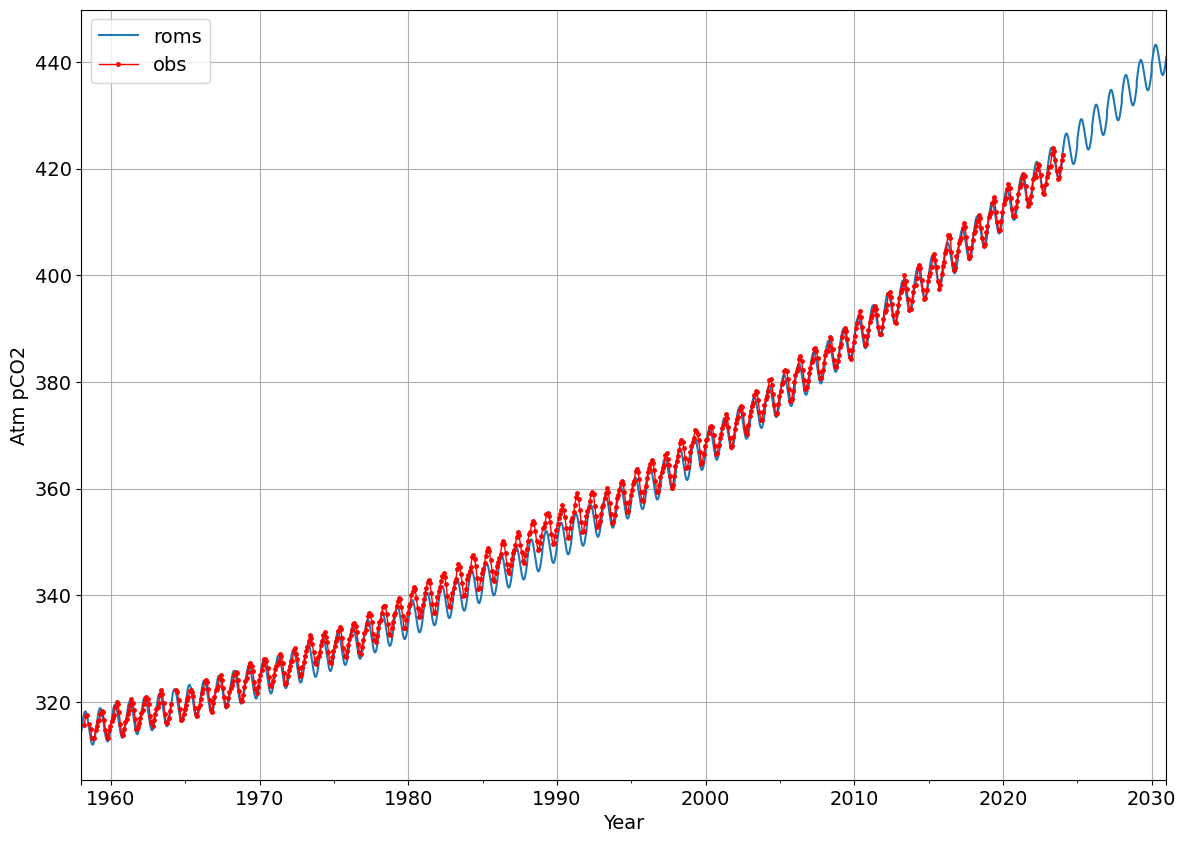

In [6]:

plt.close('all')
pfun.start_plot()
fig = plt.figure()
ax = fig.add_subplot(111)


s.plot(ax=ax)
ax.plot(df0['datetime'].values, df0['CO2 (ppm)'].values, c='red',marker='.',markersize = 5, linestyle='-', linewidth=1)
ax.grid(True)
ax.set_xlabel('Year')
ax.set_ylabel('Atm pCO2')
ax.legend(labels=['roms','obs'], loc = 'upper left')

fig_dir = Ldir['LOo'] / 'plots'/source
fig.savefig(f'{fig_dir}/pCO2_Obs_ROMS_after.png', bbox_inches='tight')

plt.show()

### Old one

In [7]:

pi2 = 6.2831853071796

D0 = 282.6
D1 = 0.125
D2 =-7.18
D3 = 0.86
D4 =-0.99
D5 = 0.28
D6 =-0.80
D7 = -8

dti = pd.date_range(start='1951-01-01', end='2030-12-31', freq='D')

pmonth = dti.year - 1951.0 + dti.dayofyear/365.0

pCO2air_secular = D0 + D1*pmonth*12.0 + D2*np.sin(pi2*pmonth+D3) + D4*np.sin(pi2*pmonth+D5) + D6*np.sin(pi2*pmonth+D7)


s = pd.Series(index=dti, data=pCO2air_secular)

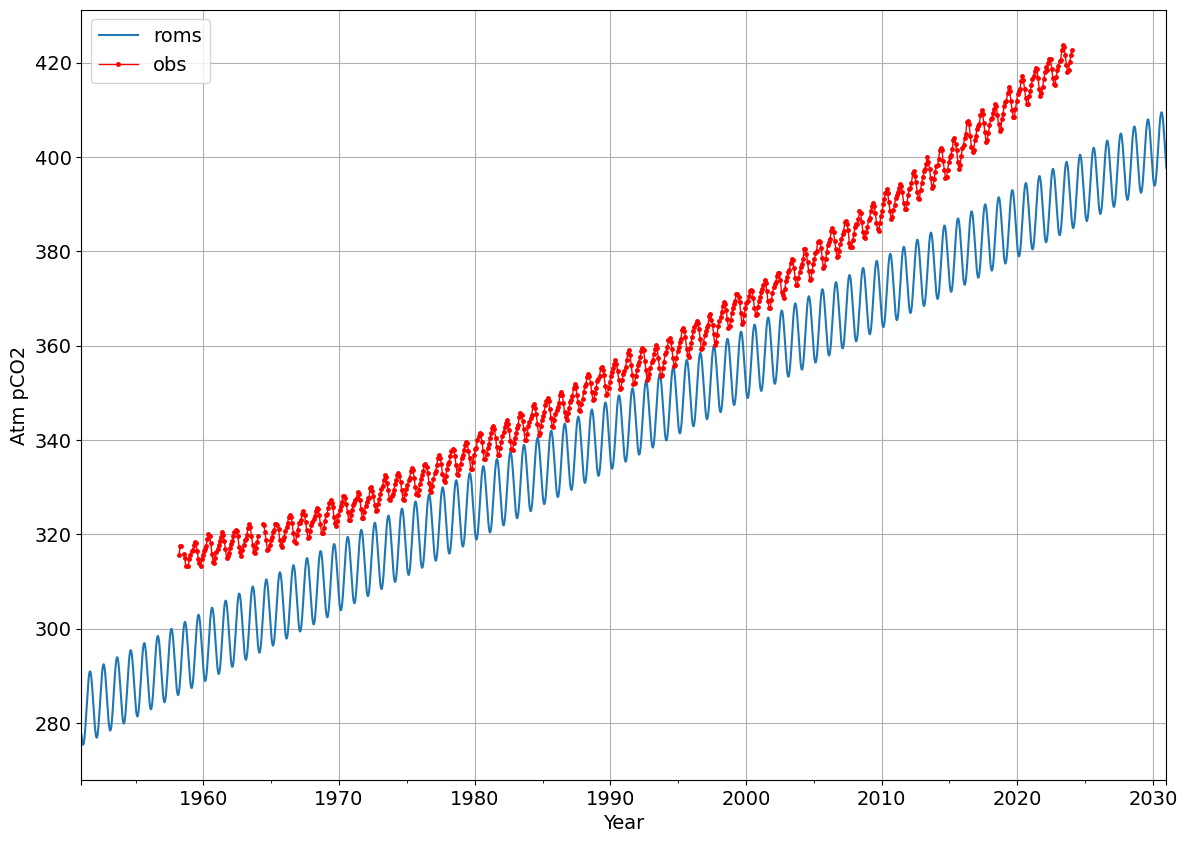

In [8]:

plt.close('all')
pfun.start_plot()
fig = plt.figure()
ax = fig.add_subplot(111)


s.plot(ax=ax)
ax.plot(df0['datetime'].values, df0['CO2 (ppm)'].values, c='red',marker='.',markersize = 5, linestyle='-', linewidth=1)
ax.grid(True)
ax.set_xlabel('Year')
ax.set_ylabel('Atm pCO2')
ax.legend(labels=['roms','obs'], loc = 'upper left')
fig.savefig(f'{fig_dir}/pCO2_Obs_ROMS_before.png', bbox_inches='tight')
plt.show()
